In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [6]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [7]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [8]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [9]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [10]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [11]:
features = sp.audio_features(playlist_tracks_id)

In [12]:
import numpy as np
import pandas as pd

In [13]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [14]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,4OhfGiEADfXzLA8Tr7CtYS,Akeli Mein Aayi,Alisha Chinai,[Alisha Chinai],0.580,0.876,0,-8.380,1,0.603,0.000403,0.451,0.707,178.421,432000,3
96,17okP544kN9LplIdJ6E3qN,Mere Sanam,Sadhana Sargam,"[Sadhana Sargam, Udit Narayan]",0.653,0.851,7,-7.636,0,0.334,0.036700,0.135,0.886,129.969,350000,4
97,6O67k5Tj6ty5Ug97IX58Y2,Chudiyan Khanak Gayeen,Lata Mangeshkar,"[Lata Mangeshkar, Ila Arun]",0.341,0.525,1,-14.295,0,0.697,0.000000,0.251,0.773,91.509,360333,4
98,78UC4S8u0bDAej8HklCNCE,Yeh Hai Pyar Pyar,Asha Bhosle,"[Asha Bhosle, Kumar Sanu]",0.589,0.380,5,-14.457,0,0.685,0.000000,0.114,0.564,149.110,294000,4
99,0LdJcUxGJywXLcxdXZ4wsb,Mere Khwabon Mein Tu,Alka Yagnik,"[Alka Yagnik, Kumar Sanu]",0.712,0.741,7,-7.971,0,0.179,0.000003,0.078,0.540,114.975,335000,4


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\Mrinmoy Sadhukhan\anaconda3\envs\nltk_pipeline\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Kumar Sanu'),
  Text(1, 0, 'Asha Bhosle'),
  Text(2, 0, 'Udit Narayan'),
  Text(3, 0, 'S. P. Balasubrahmanyam'),
  Text(4, 0, 'Lata Mangeshkar'),
  Text(5, 0, 'Vinod Rathod'),
  Text(6, 0, 'KK'),
  Text(7, 0, 'A.R. Rahman'),
  Text(8, 0, 'Alka Yagnik'),
  Text(9, 0, 'Sonu Nigam'),
  Text(10, 0, 'Pankaj Udhas'),
  Text(11, 0, 'Hariharan'),
  Text(12, 0, 'Jatin Pandit'),
  Text(13, 0, 'Kavita Krishnamurthy'),
  Text(14, 0, 'Roop Kumar Rathod'),
  Text(15, 0, 'Abhijeet'),
  Text(16, 0, 'Jatin-Lalit'),
  Text(17, 0, 'Sukhwinder Singh'),
  Text(18, 0, 'Anuradha Paudwal'),
  Text(19, 0, 'Makhdoom Mohiuddin'),
  Text(20, 0, 'Jaishree Shivram'),
  Text(21, 0, 'Shankar Mahadevan'),
  Text(22, 0, 'Sultan Khan'),
  Text(23, 0, 'Amit Kumar'),
  Text(24, 0, 'Pamela Chopra'),
  Text(25, 0, 'Alisha Chinai'),
  Text(26, 0, 'Sadhana Sargam')])

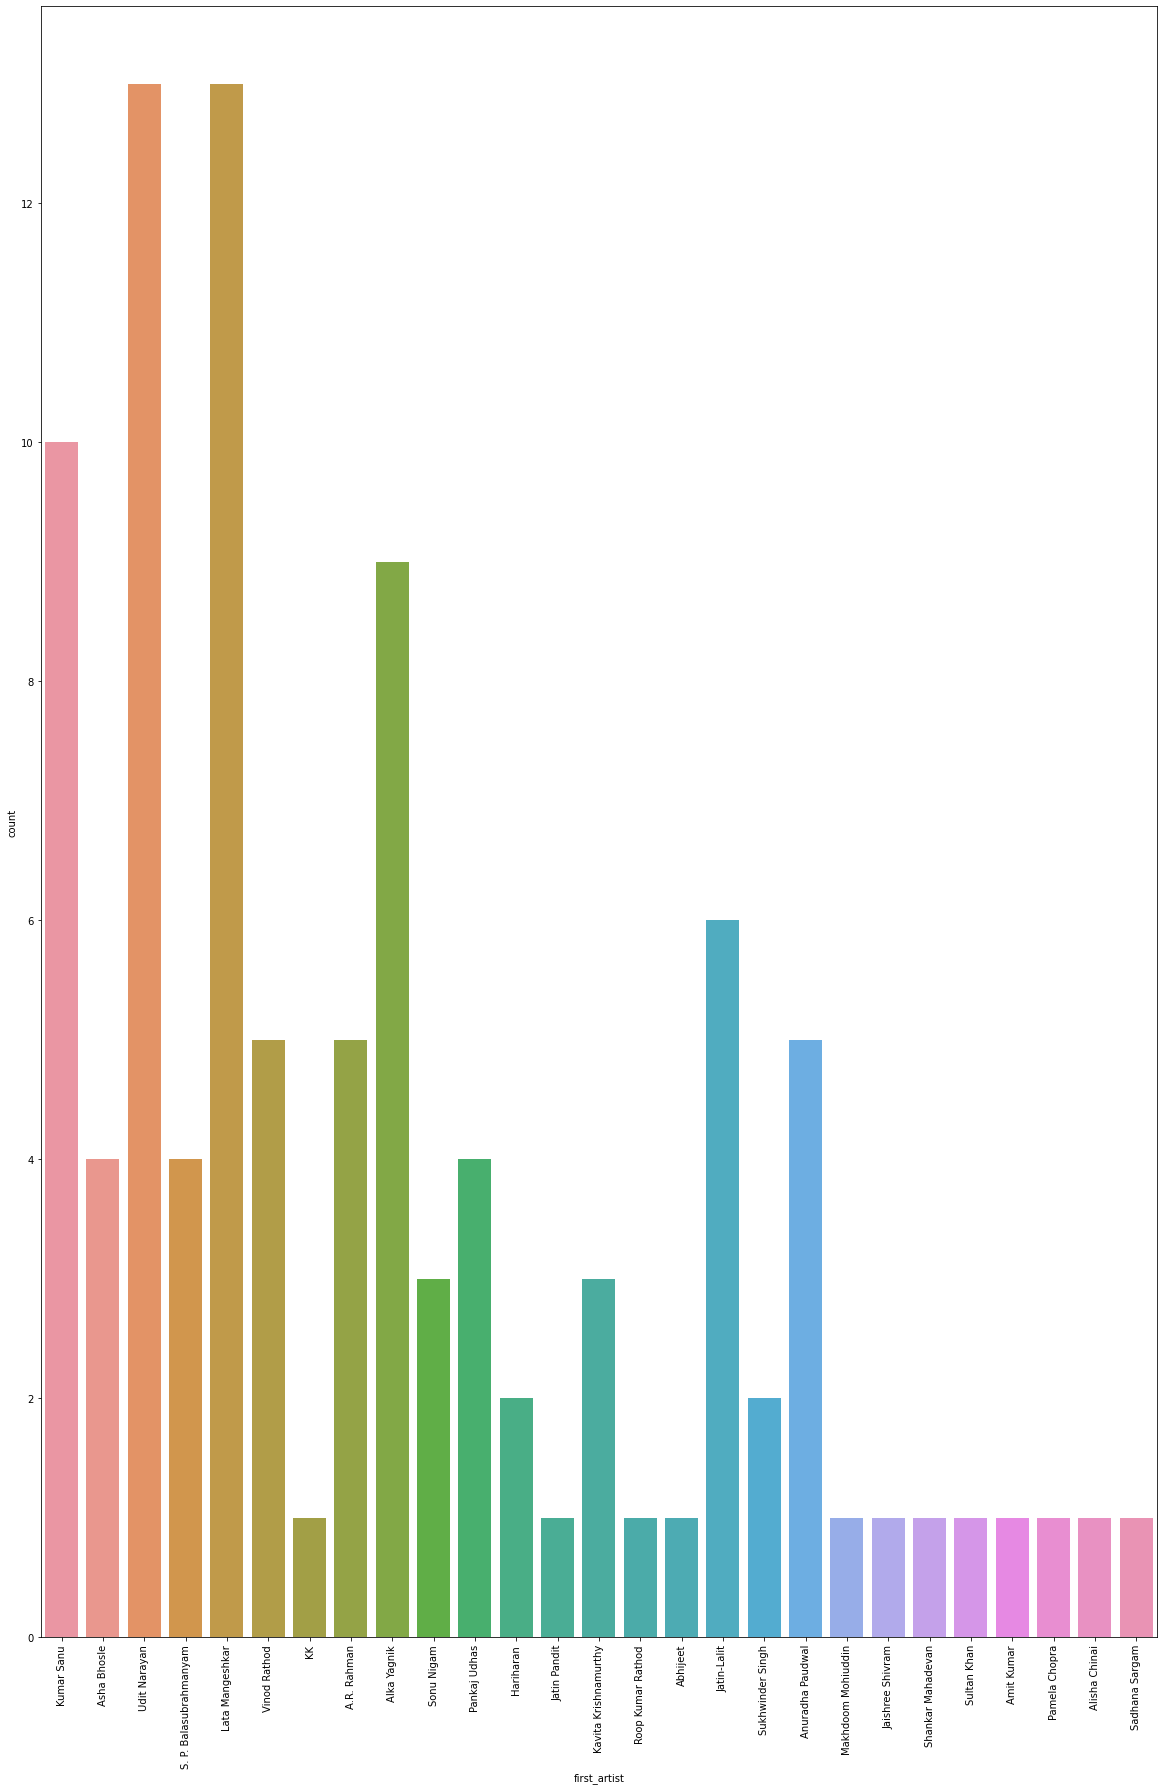

In [16]:
plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [ ]:
#features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)

In [22]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

Text(0.5, 0, 'num_segments')

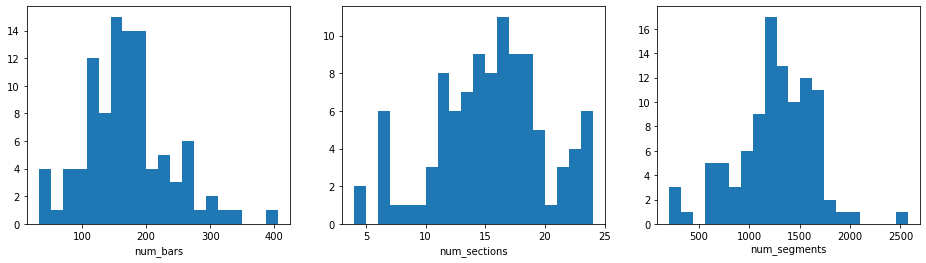

In [23]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

In [24]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,29J4C9Mk0FoMifAUb2AnmK,Teri Isi Ada Pe Sanam,Kumar Sanu,"[Kumar Sanu, Sadhana Sargam]",0.478,0.438,6,-13.695,1,0.738,0.000043,0.3720,0.829,153.060,311798,3,264,17,1220
1,69yvE5MyvJtMCx75cPl583,Kitaben Bahut Si,Asha Bhosle,"[Asha Bhosle, Vinod Rathod]",0.619,0.721,2,-7.530,0,0.423,0.000086,0.0587,0.808,97.320,389387,4,156,16,1608
2,6LVYBlYJ4pezcfk7V8Tttk,Chand Chhupa Badal Mein,Udit Narayan,"[Udit Narayan, Alka Yagnik]",0.402,0.610,11,-9.509,0,0.368,0.000000,0.1090,0.463,86.248,347013,4,122,16,1301
3,47flSBZJFtT4cVsC1OXOMt,Pehla Pehla Pyar-Spbalasubhramaniam,S. P. Balasubrahmanyam,[S. P. Balasubrahmanyam],0.594,0.530,5,-10.226,0,0.443,0.000004,0.4210,0.457,101.831,264307,4,111,11,952
4,1AhXEDyg2AbV7CAnyiAMvM,Mere Khwabon Mein,Lata Mangeshkar,[Lata Mangeshkar],0.621,0.512,7,-11.074,0,0.634,0.000000,0.0803,0.926,114.802,256440,4,122,6,1020


In [25]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv", encoding='utf-8',index="false")

In [ ]:
"https://machinelearningknowledge.ai/tutorial-how-to-use-spotipy-api-to-scrape-spotify-data/"